<center>
    <img src='images/small-uai.jpeg'style="width: 300px;">
</center>

# Laboratorio S01: Tensores y regresión lineal

## _Deep learning_
   
<center>
    <img src='images/regresion-lineal-python.png'style="width: 400px;">
    <sub><sup>https://miro.medium.com/max/1900/1*TzBsVJUXqofGqdsBJRvXEw.png</sup></sub> 
</center>

**Profesor**: Dr. Juan Bekios Calfa

**Grado**: MIA

# Laboratorio 01: Regresión Lineal y Redes Neuronales

## Objetivo:

1.   Introducción a tensores.
2.   Implementar el algoritmo de regresión lineal utilizando Python.
3.   Implementar el algoritmo de regresión lineal utilizando las librerías Torch.
4. Implementar el algoritmo de regresión lineal utilizando Torch.

## 1. Introducción a tensores

Un tensor PyTorch es básicamente lo mismo que una matriz numpy: no sabe nada sobre aprendizaje profundo o 
gráficos computacionales o gradientes, y es solo una matriz genérica n-dimensional que se utilizará para 
el cálculo numérico arbitrario.

![picture](https://empresas.blogthinkbig.com/wp-content/uploads/2020/04/tensor1.png?resize=640%2C423)


### 1.1 Crear un tensor

In [5]:
import torch
import numpy as np

In [6]:
# Crear un tensor vacío: No inicializado
x = torch.empty(1) # escalar
print(x)

x = torch.empty(3) # vector, 1D
print(x)

x = torch.empty(2,3) # matriz, 2D
print(x)

x = torch.empty(2,2,3) # tensor, 3 dimensions
#x = torch.empty(2,2,2,3) # tensor, 4 dimensions
print(x)

tensor([2.6833e-09])
tensor([ 1.2193e+34,  3.0928e-41, -1.0406e-01])
tensor([[1.2198e+34, 3.0928e-41, 1.2143e+34],
        [3.0928e-41, 2.6258e-06, 2.3329e-18]])
tensor([[[-1.0406e-01,  4.5869e-41,  1.2169e+34],
         [ 3.0928e-41,  1.2191e+34,  3.0928e-41]],

        [[ 1.2144e+34,  3.0928e-41,  1.9430e-19],
         [ 1.9432e-19,  1.0271e-32,  1.3563e-19]]])


In [7]:
# Lista python construir un tensor
list = [[1,2], [3, 4], [5, 6]]
tensor1 = torch.tensor(list)

print(tensor1)
print(tensor1.shape)

# Crear un tensor de una lista
tensor2 = torch.tensor([[1,2], [3, 4], [5, 6]])
print(tensor2)

# Crear un tensor a partir de una matriz numpy
imagen = np.array([1,2,3,4])
tensor3 = torch.tensor(imagen)
#print(tensor3)
#print(tensor3.shape)

# Torch tensor de números aleatorios
tensor4 = torch.rand(2,3)
#print(tensor4)
#print(tensor4.shape)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([1, 2, 3, 4])
torch.Size([4])
tensor([[0.4805, 0.3235, 0.4078],
        [0.7198, 0.4640, 0.1541]])
torch.Size([2, 3])


### 1.2 Estructura de un tensor

El método *size()* permite ver el tamaño de un tensor, su rango y las dimensiones.

In [ ]:
print(tensor1.size())

torch.Size([3, 2])


### 1.3 Acceso a un tensor

Los elementos de un tensor pueden ser accesados de la misma manera que en **numpy** (librerías de matrices de Python).

In [ ]:
print(tensor1)
print(tensor1[1]) # Obtengo la fila dos de el tensor (completa)
print(tensor1[1,1]) # Obtengo el elemento de la posición de la fila 2 y columna 2

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([3, 4])
tensor(4)


### 1.4 Uso de tensores con CUDA (GPU)

Pytorch permite trabajar con CUDA para realizar operaciones matemáticas en GPU (Si se cuenta con una).

In [8]:
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

True
0
GeForce GTX 1660 SUPER


### 1.5 CPU vs GPU

In [10]:
%%time
# Tiempo CPU
for i in range(500):
  x = torch.randn(1000, 1000)
  y = torch.randn(1000, 1000)
  z = torch.matmul(x, y)


CPU times: user 48.4 s, sys: 875 ms, total: 49.3 s
Wall time: 9.55 s


In [15]:
%%time
# Tiempo GPU
cuda0 = torch.device('cuda:0')
for i in range(500):
  x = torch.randn(1000, 1000, device=cuda0)
  y = torch.randn(1000, 1000, device=cuda0)
  z = torch.matmul(x, y)

A = torch.tensor([[1,2], [3, 4], [5, 6]], device=cuda0)
print(A)

tensor([[1, 2],
        [3, 4],
        [5, 6]], device='cuda:0')
CPU times: user 352 ms, sys: 64.2 ms, total: 416 ms
Wall time: 416 ms


## 2. Regresión lineal (I):

Se realiza el cálculo de una regresión lineal por medio del cálculo manual de los gradientes (derivada de la función de pérdida).

Como ejemplo utilizaremos base de datos muy simple. La hipótesis será lineal:

$$y = \theta_0 \cdot x$$

Sin intercepto o _bias_ para simplificar el problema y explicarlo con claridad.


### Base de datos

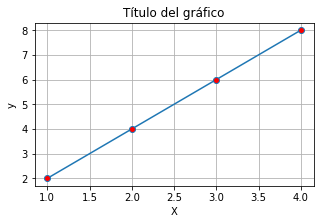

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

X = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

plt.plot(X, y, marker='o', markerfacecolor='red')
plt.title('Título del gráfico')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)

### 2.1 Regresión lineal utilizando descenso de gradiente

Para calcular una regresión lineal utilizando **descenso de gradiente** debemos contar con los siguientes constructos:



*  **Hipótesis:** Función de lineal, para el ejemplo nuestra hipótesis será: $$\hat{y}=\theta_0 \cdot x$$ Es la fución que hace la predicción una vez que fueron aprendidos los parámetros, también se denota como: $$\hat{y}=h_\theta(x)$$


*  **Función de pérdida**: Error cuadrático medio (MSE, _mean squared error_), $$l(y,\hat{y})=\frac{1}{N}\cdot (y -\hat{y})^2$$

*  **Derivada de la función de pérdida**: $$\frac{dl}{d\theta_0} = \frac{1}{N}\cdot 2x(\theta_0 x - y)$$

In [31]:
import numpy as np

X = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

# Inicializo con cualquier valor los tetas (W)
W = 0.0

# Hipótesis: Lineal (f(x)=w*x)
def forward(x):
  return W * x

# Loss: MSE
def loss(y, y_pred):
  return ((y - y_pred)**2).mean()

# Gradiente
# L = MSE = 1/N * (w*x - y) ** 2
# dL/dW = 1/N * 2x(w*x -y)
def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred - y).mean()

print(f'Predicción antes de entrenar: f(5) = {forward(5):.3f}')

Predicción antes de entrenar: f(5) = 0.000


In [ ]:
# Entrenar nuestro modelo: Descenso de gradiente.
learning_rate = 0.01
n_iter = 20

for epoch in range(n_iter):
  # Prediccion
  y_pred = forward(X)

  # Error
  l = loss(y, y_pred)

  # Calculo de gradientes 
  dw = gradient(X, y, y_pred)

  # Actualizar los pesos
  W = W - learning_rate * dw

  if epoch % 2 == 0:
    print(f'epoch {epoch+1}: w = {W:.3f}, loss = {l:.8f}')

print(f'Predicción después de entrenar: f(5) = {forward(5):.3f}')

### 2.2 Regresión lineal (II):

En este caso se realiza el cálculo de los parámetros de la regresión lineal por medio del cálculo manual de los gradientes (derivada de la función de pérdida).

In [ ]:
import torch

# Pasar todos los vectores a tensores
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# Salida modelo (prediccion del modelo)
def forward(x):
  return x * w
  
# loss = MSE
def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

print(f'Prediccion antes del entrenamiento: f(5) = {forward(5).item():.3f}')

Prediccion antes del entrenamiento: f(5) = 0.000
epoch 0: w = 0.600, loss = 30.00000000
epoch 3: w = 1.520, loss = 3.52946997
epoch 6: w = 1.835, loss = 0.41523871
epoch 9: w = 1.944, loss = 0.04885240
epoch 12: w = 1.981, loss = 0.00574747
epoch 15: w = 1.993, loss = 0.00067618
epoch 18: w = 1.998, loss = 0.00007955
epoch 21: w = 1.999, loss = 0.00000936
epoch 24: w = 2.000, loss = 0.00000110
epoch 27: w = 2.000, loss = 0.00000013
Predicción después de entrenar: f(5) = 10.000


In [32]:
# Fase: Entrenamiento
learning_rate = 0.02
n_iter = 30

for epoch in range(n_iter):
  # 1. Prediccion
  y_pred = forward(X)

  # 2. Calcular error
  l = loss(y, y_pred)

  # 3. Calcular los gradientes
  l.backward()

  # 4. Actualizar los pesos
  with torch.no_grad():
    w -= learning_rate * w.grad

  # 5. Dejar en zero los valores de gradiente de w
  w.grad.zero_()

  if epoch % 3 == 0:
    print(f'epoch {epoch}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Predicción después de entrenar: f(5) = {forward(5).item():.3f}')


AttributeError: 'numpy.float32' object has no attribute 'backward'

### 2.3. Regresión lineal (III):

Cálculo de los parámetros de la regresión lineal utilizando Pytorch (derivada de la función de pérdida).

In [34]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def gradiente_descent(X, y, iters=10):
  n_samples, n_features = X.shape

  # 1.1) Defino la hipotesis
  input_size = n_features
  output_size = 1
  model = nn.Linear(input_size, output_size)

  # 1.2) Funcion de perdida y configurar los parametros del optimizador
  learning_rate = 0.01
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  # 1.3) Ciclo de entrenamiento
  num_epochs = iters
  for epoch in range(num_epochs):
    # Calcular la prediccion
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # Actualiza el modelo
    loss.backward() #Calcular los gradientes
    optimizer.step()

    # Dejar los gradientes en cero
    optimizer.zero_grad()

    if epoch % 2 == 0:
      print(f'epoch {epoch}:  loss = {loss.item():.8f}') 
    
  return model  

In [36]:
def plot_fit(X_numpy, y_numpy, y_pred):
  plt.plot(X_numpy, y_numpy, 'ro', label='$Y_{real}$')
  plt.plot(X_numpy, y_pred, 'bo', label='$Y_{estimado}$')
  plt.xlabel('X - Variable Independiente')
  plt.ylabel('Y - Variable Dependiente')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.show()


## 3. Visualización del descenso de gradiente

epoch 0:  loss = 6223.44873047


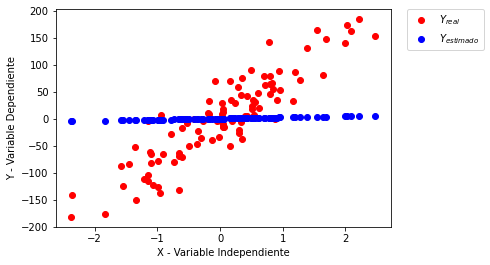

In [37]:
from sklearn import datasets
#import matplotlib.pyplot as plt

# 0) Cargar datos
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=40, random_state=4)

# cast a Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

# 1) Entrenamiento
model = gradiente_descent(X, y, iters=1)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 6260.41943359
epoch 2:  loss = 5884.32617188
epoch 4:  loss = 5536.00683594


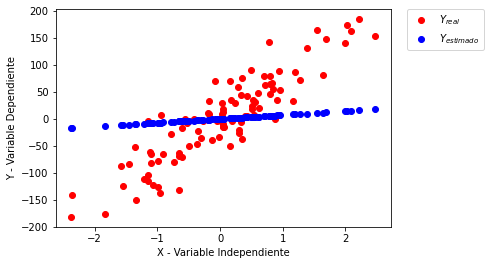

In [38]:
# 1) Entrenamiento
model = gradiente_descent(X, y, iters=5)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 6251.26171875
epoch 2:  loss = 5875.63671875
epoch 4:  loss = 5527.76757812
epoch 6:  loss = 5205.59716797
epoch 8:  loss = 4907.22705078
epoch 10:  loss = 4630.89599609
epoch 12:  loss = 4374.97265625
epoch 14:  loss = 4137.94824219
epoch 16:  loss = 3918.42529297
epoch 18:  loss = 3715.10961914


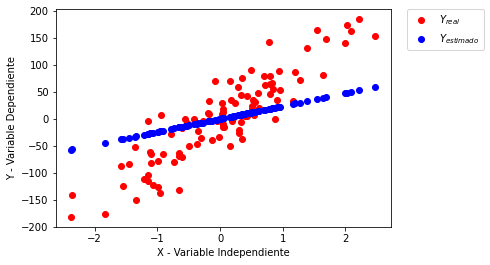

In [39]:
# 1) Entrenamiento
model = gradiente_descent(X, y, iters=20)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 6395.41796875
epoch 2:  loss = 6009.61865234
epoch 4:  loss = 5652.28857422
epoch 6:  loss = 5321.32617188
epoch 8:  loss = 5014.78076172
epoch 10:  loss = 4730.85107422
epoch 12:  loss = 4467.86425781
epoch 14:  loss = 4224.27490234
epoch 16:  loss = 3998.64941406
epoch 18:  loss = 3789.66064453
epoch 20:  loss = 3596.08178711
epoch 22:  loss = 3416.77441406
epoch 24:  loss = 3250.68505859
epoch 26:  loss = 3096.83740234
epoch 28:  loss = 2954.32934570
epoch 30:  loss = 2822.32324219
epoch 32:  loss = 2700.04321289
epoch 34:  loss = 2586.77319336
epoch 36:  loss = 2481.84765625
epoch 38:  loss = 2384.65112305
epoch 40:  loss = 2294.61376953
epoch 42:  loss = 2211.20751953
epoch 44:  loss = 2133.94311523
epoch 46:  loss = 2062.36816406
epoch 48:  loss = 1996.06298828
epoch 50:  loss = 1934.63903809
epoch 52:  loss = 1877.73657227
epoch 54:  loss = 1825.02221680
epoch 56:  loss = 1776.18762207
epoch 58:  loss = 1730.94689941
epoch 60:  loss = 1689.03479004
epoch 62:  lo

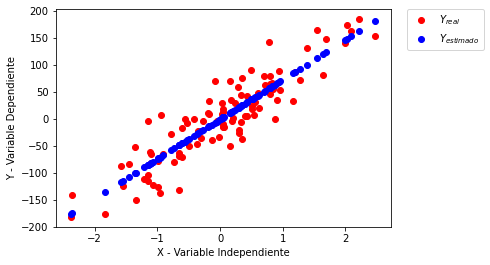

In [40]:
# 1) Entrenamiento
model = gradiente_descent(X, y, iters=300)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)